In [1]:
import networkx as nx
import numpy as np
from utils import load_graph, rodger_graphs, weighted_graphs, unweighted_graphs
from relative_error import spe_relative_error
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ks = [2,3,4,5,6,7,8,9,10]
s = 10
nv = 100

In [3]:
def add_relative_error(df, G, ks, s, nv, is_weighted, graph_path=""):
    now_id = 0
    if df.shape[0]>0:
        now_id = df["id"].max()+1
    print("id:", now_id)
    Gtypes = ["normalized_laplacian", "laplacian", "adjacency"]
    for Gtype in Gtypes:
        errors = spe_relative_error(G, ks, s, nv, Gtype=Gtype, avg_times=10, graph_path=graph_path)
        for i, k in enumerate(ks):
            df = df.append({"id":now_id, "relative_error":errors[i], "k":k, "matrix":Gtype},ignore_index=True)
    return df

df = pd.DataFrame(columns=["id", "relative_error", "k", "matrix"])

# unweighted_graphs
is_weighted = False
for path in unweighted_graphs:
    print("path:", path)
    G = load_graph(path, is_weighted)
    N = G.number_of_nodes()
    M = G.number_of_edges()
    print(f"N:{N}, M:{M}")
    df = add_relative_error(df, G, ks,s,nv,is_weighted)

    
# rodger_graphs
is_weighted = False
for path in rodger_graphs:
    print("path:", path)
    G = load_graph(path, is_weighted)
    N = G.number_of_nodes()
    M = G.number_of_edges()
    print(f"N:{N}, M:{M}")
    df = add_relative_error(df, G, ks,s,nv,is_weighted, graph_path=path)
    
# weighted_graphs
is_weighted = True
for path in weighted_graphs:
    print("path:", path)
    G = load_graph(path, is_weighted)
    N = G.number_of_nodes()
    M = G.number_of_edges()
    print(f"N:{N}, M:{M}")
    df = add_relative_error(df, G, ks,s,nv,is_weighted)




path: data/networkrepository/bio/bio-celegans/bio-celegans.mtx
N:453, M:2025
id: 0
path: data/networkrepository/bio/bio-celegans-dir/bio-celegans-dir.edges
N:453, M:2040
id: 1
path: data/networkrepository/bio/bio-diseasome/bio-diseasome.mtx
N:516, M:1188
id: 2
path: data/networkrepository/cheminformatics/ENZYMES_g295/ENZYMES_g295.edges
N:123, M:139
id: 3
path: data/networkrepository/cheminformatics/ENZYMES_g296/ENZYMES_g296.edges
N:125, M:141
id: 4
path: data/networkrepository/cheminformatics/ENZYMES_g297/ENZYMES_g297.edges
N:121, M:149
id: 5
path: data/networkrepository/interaction/ia-crime-moreno/ia-crime-moreno.edges
N:829, M:1475
id: 6
path: data/networkrepository/interaction/ia-email-univ/ia-email-univ.mtx
N:1133, M:5451
id: 7
path: data/networkrepository/interaction/ia-enron-only/ia-enron-only.mtx
N:143, M:623
id: 8
path: data/networkrepository/interaction/ia-fb-messages/ia-fb-messages.mtx
N:1266, M:6451
id: 9
path: data/networkrepository/interaction/ia-infect-dublin/ia-infect-du

In [4]:
df[df["relative_error"]>1 ]

,id,relative_error,k,matrix
532,19,452779.922069,3,adjacency
534,19,131363.919965,5,adjacency
536,19,88801.266707,7,adjacency
538,19,66763.265030,9,adjacency
559,20,180550.028178,3,adjacency
561,20,186260.351212,5,adjacency
563,20,188429.870081,7,adjacency
565,20,166684.897047,9,adjacency
586,21,62969.591268,3,adjacency
588,21,46842.595743,5,adjacency


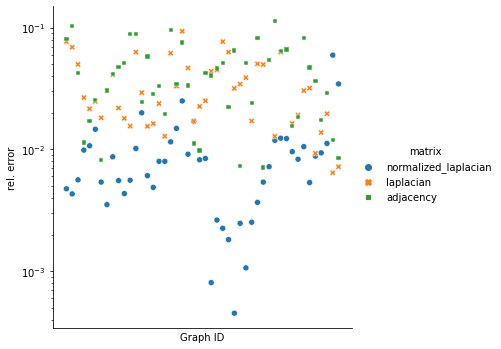

In [111]:
k = 4
tmp_df = df[df["k"]==k]
ax = sns.relplot(
    data=tmp_df,
    x="id", y="relative_error",
    hue="matrix", style="matrix"
)
ax.set(xlabel="Graph ID",ylabel="rel. error", yscale="log", xticks=[]) #
plt.savefig(f'plot/plot_each_graph_k{k}.png')
plt.show()